In [41]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# 1. Load the particle output
ds_particles = xr.open_zarr("MOM6salmonira_no123_nfish10_kappaF0.00_kappaB0.50_kappaI0.01.zarr")

lon = ds_particles['lon']  # (time, traj)
lat = ds_particles['lat']

/tmp/ipykernel_572494/2329826137.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_particles = xr.open_zarr("MOM6salmonira_no123_nfish10_kappaF0.00_kappaB0.50_kappaI0.01.zarr")


In [43]:
# 2. Load the static bathymetry (from MOM6)
ds_bathy = xr.open_dataset("/server/hpc/lol_scratch/Leah/salmonira/flow_fields/psl_flow_fields/ocean_static.nc")

depth = ds_bathy['deptho']  # (yh, xh)
lon_bathy = ds_bathy['geolon'].values  # h-grid
lat_bathy = ds_bathy['geolat'].values

In [44]:
print("lon shape:", lon.shape)
print("lat shape:", lat.shape)
print("lon min/max:", np.nanmin(lon), np.nanmax(lon))
print("lat min/max:", np.nanmin(lat), np.nanmax(lat))

lon shape: (10, 20)
lat shape: (10, 20)
lon min/max: 235.3027 236.22214
lat min/max: 46.00612 46.83517


In [45]:
# Get first time index for each particle
initial_lon = ds_particles['lon'].isel(obs=0)
initial_lat = ds_particles['lat'].isel(obs=0)

print(initial_lon.values)
print(initial_lat.values)

[235.94383 235.89247 235.8943  235.92746 235.94856 235.91484 235.9641
 235.93936 235.91673 235.90186]
[46.119755 46.166237 46.12857  46.09081  46.126953 46.168915 46.1129
 46.102173 46.148476 46.141388]


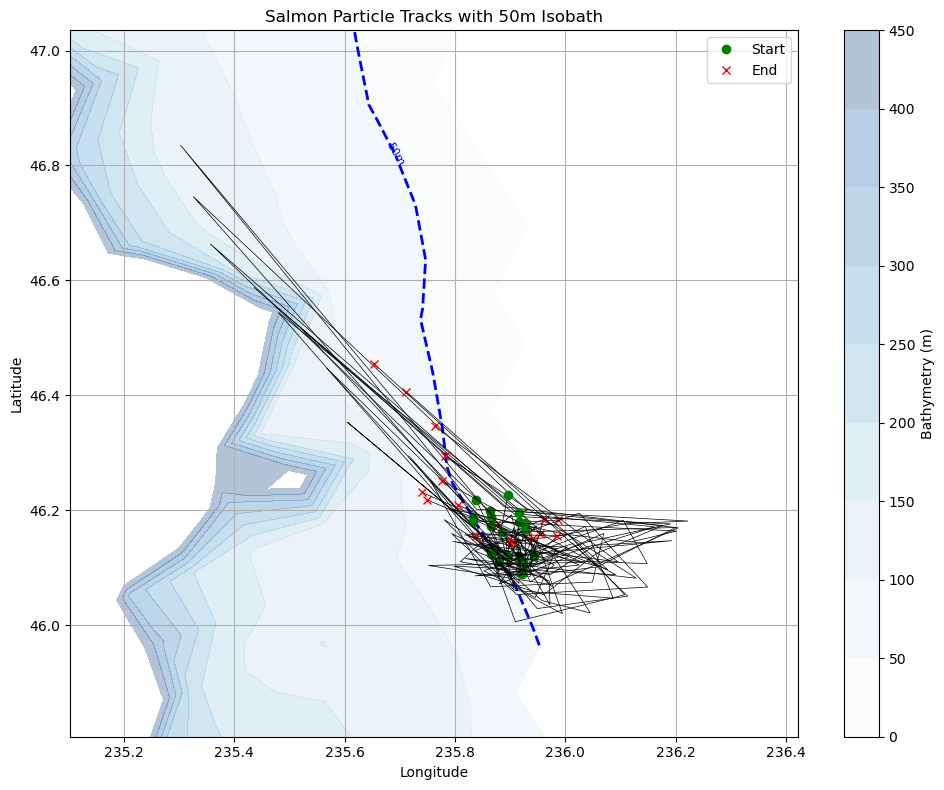

In [48]:
plt.figure(figsize=(10, 8))

# === Bathymetry shading (context) ===
contourf = plt.contourf(
    lon_bathy, lat_bathy, depth,
    levels=np.arange(0, 500, 50),
    cmap='Blues', alpha=0.3
)

# === 50m isobath line ===
contour = plt.contour(
    lon_bathy, lat_bathy, depth,
    levels=[50], colors='blue', linewidths=2, linestyles='--'
)
plt.clabel(contour, inline=True, fontsize=8, fmt="50m")

# === Particle tracks ===
for p in range(lon.shape[1]):
    plt.plot(lon[:, p], lat[:, p], color='black', lw=0.5)
    plt.plot(lon[0, p], lat[0, p], 'go', label='Start' if p == 0 else "")   # green start
    plt.plot(lon[-1, p], lat[-1, p], 'rx', label='End' if p == 0 else "")  # red end

# === Expand map domain by 0.2° in all directions ===
plt.xlim(lon.min() - 0.2, lon.max() + 0.2)
plt.ylim(lat.min() - 0.2, lat.max() + 0.2)

# === Labels and title ===
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Salmon Particle Tracks with 50m Isobath")
plt.grid(True)
plt.colorbar(contourf, label="Bathymetry (m)")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


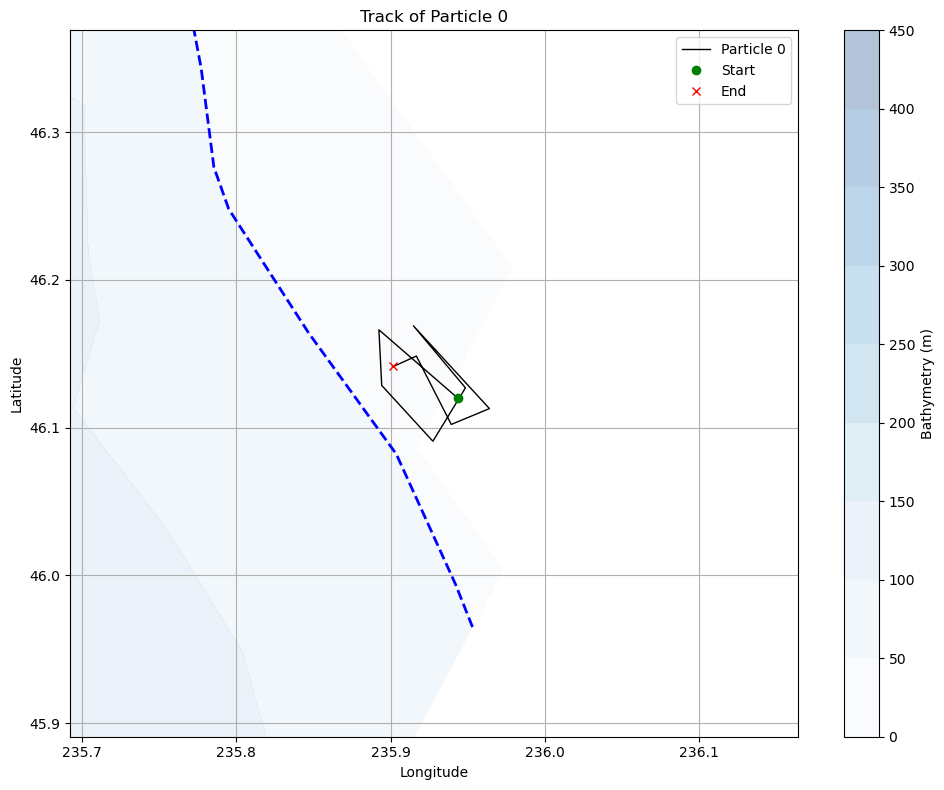

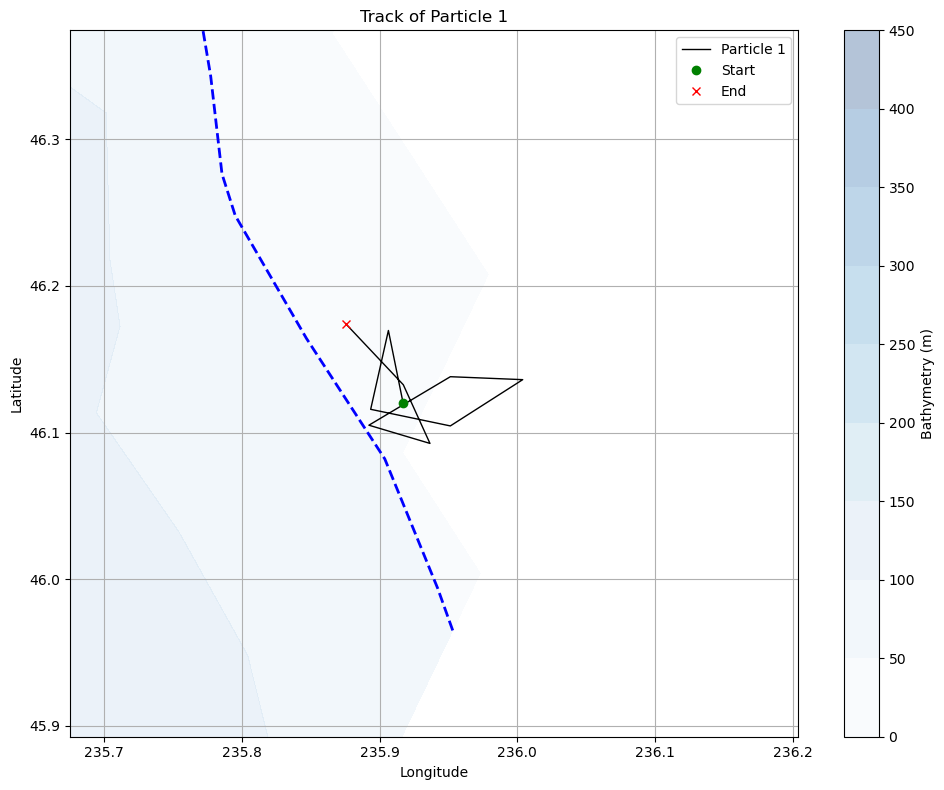

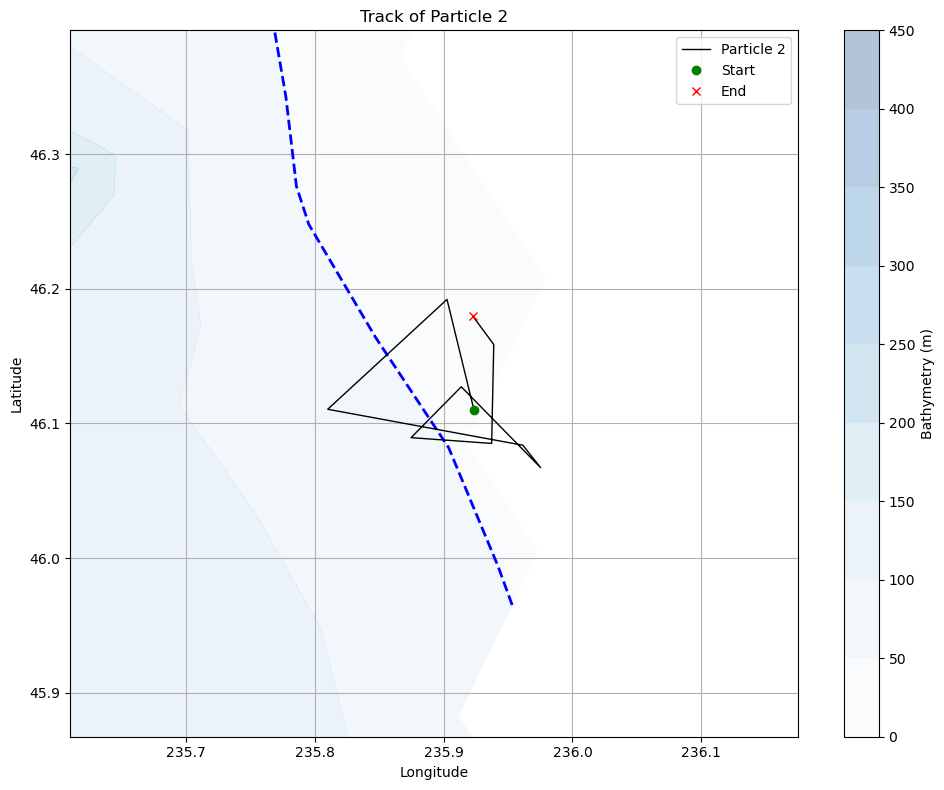

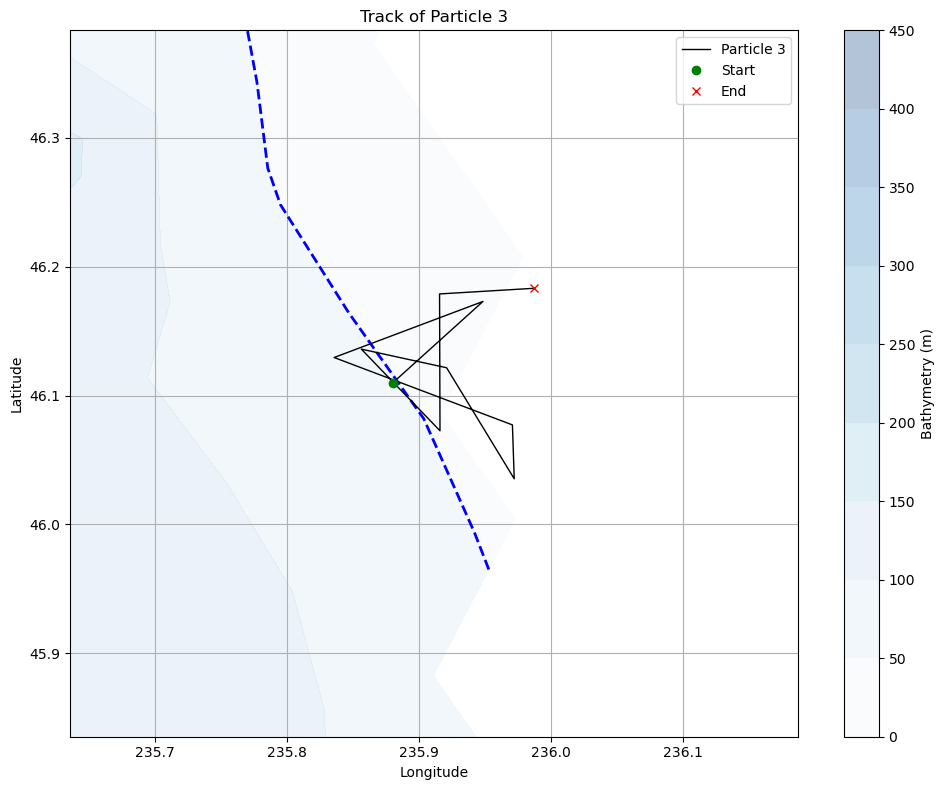

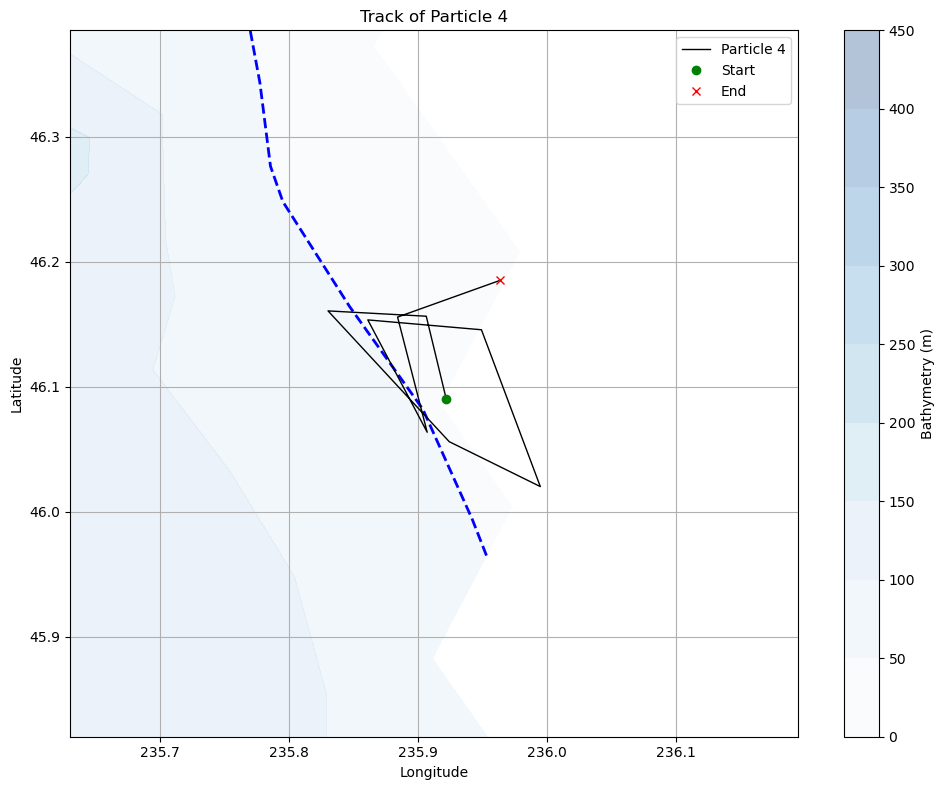

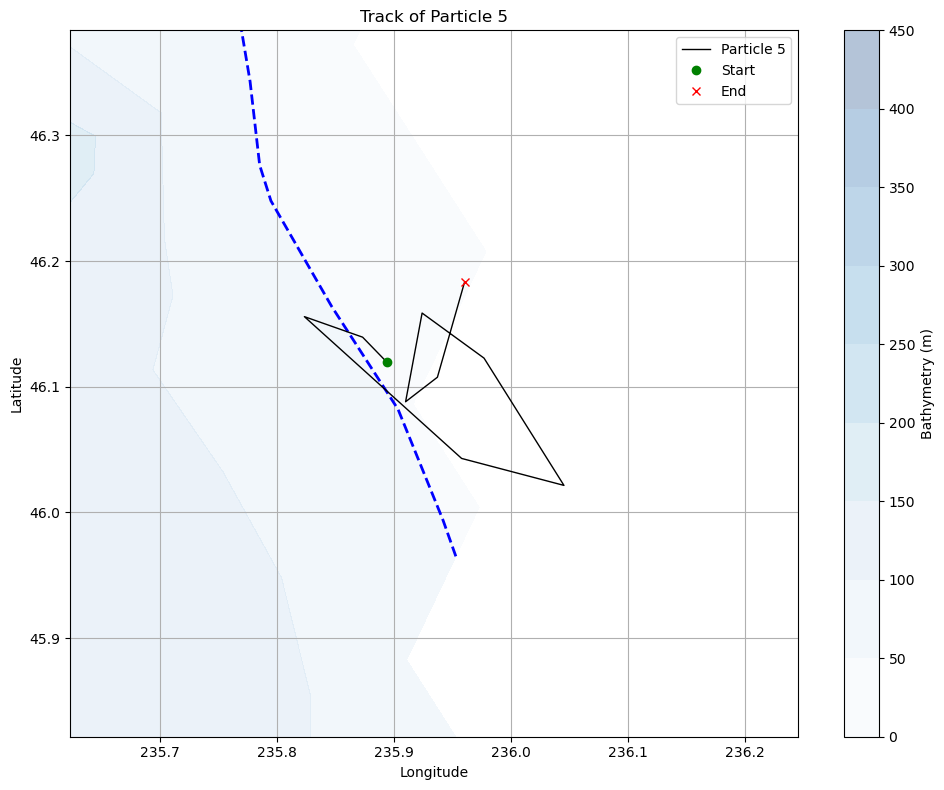

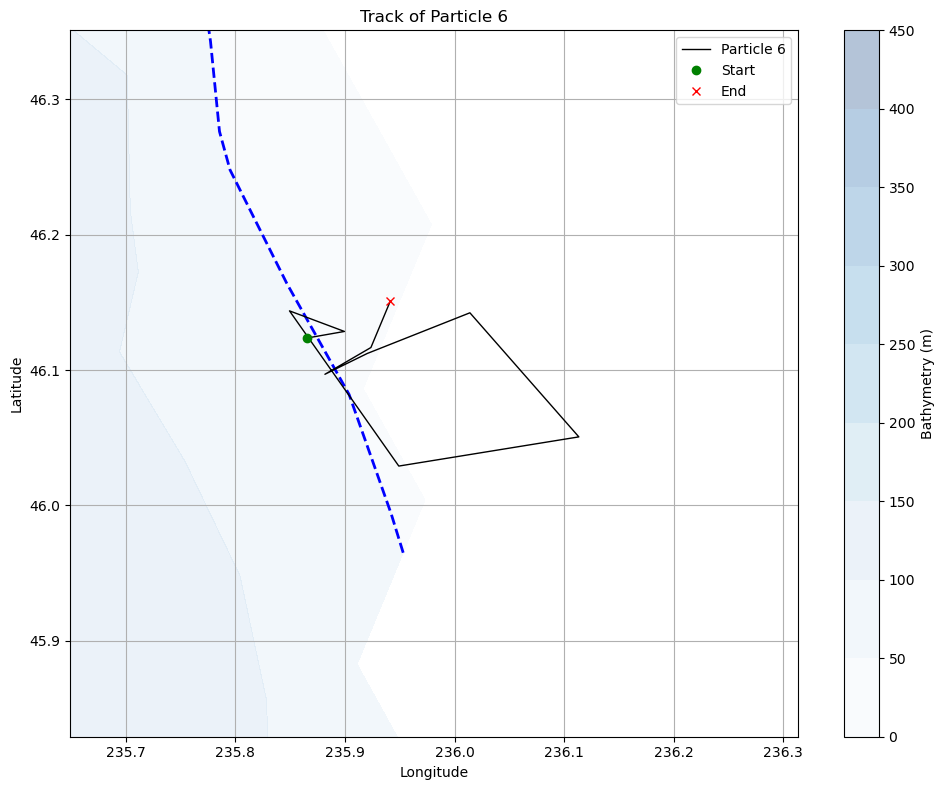

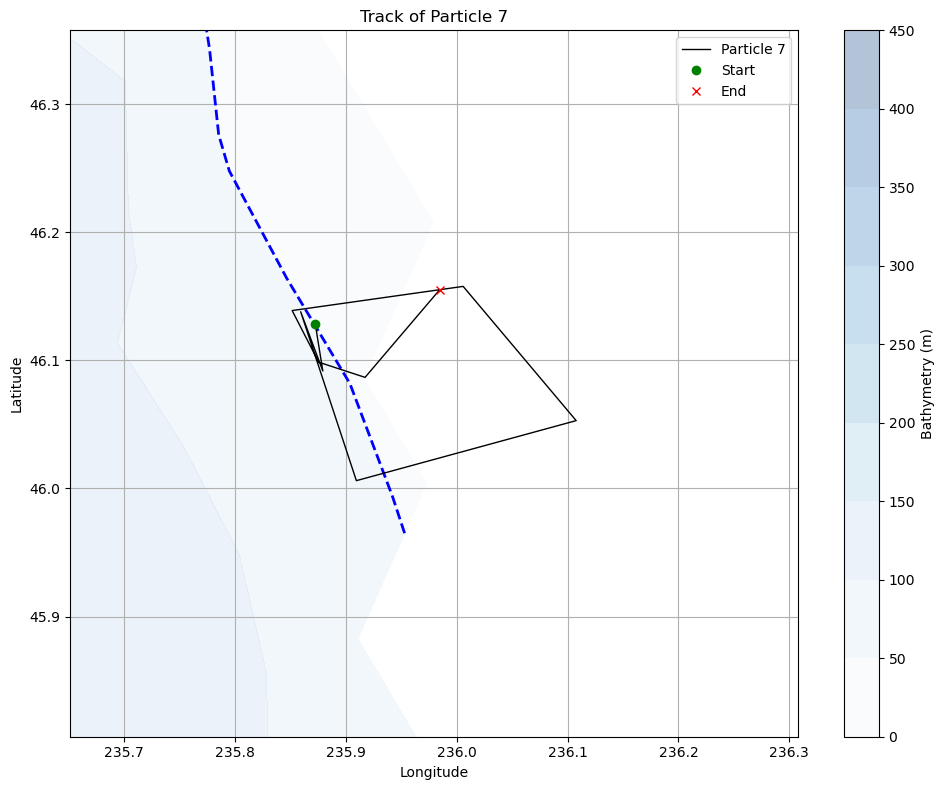

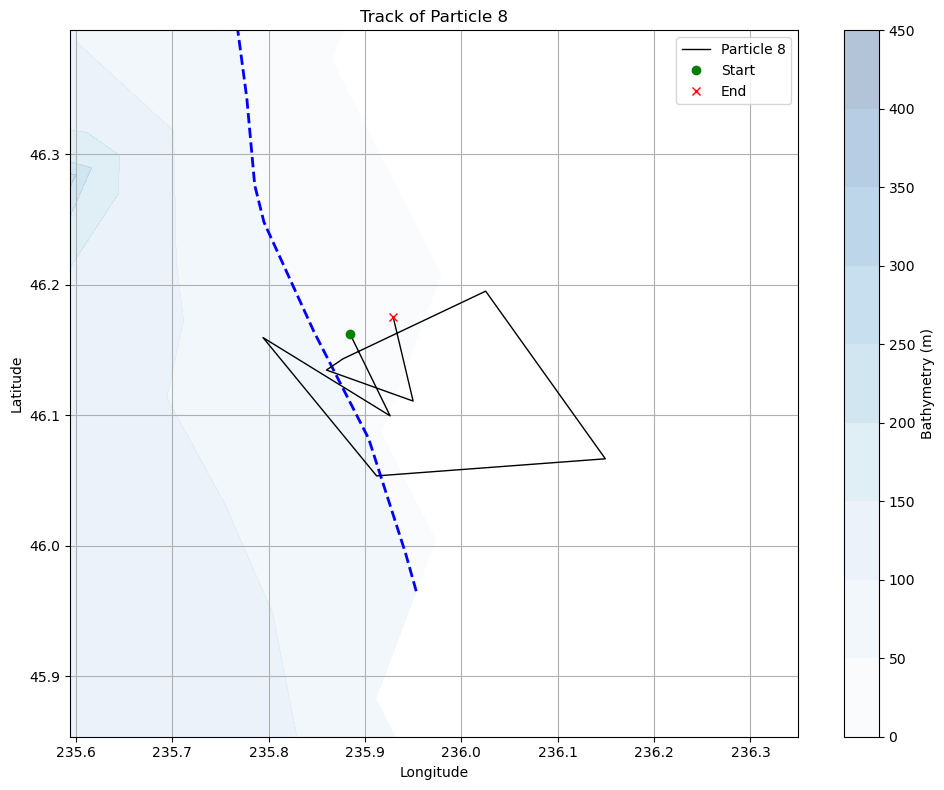

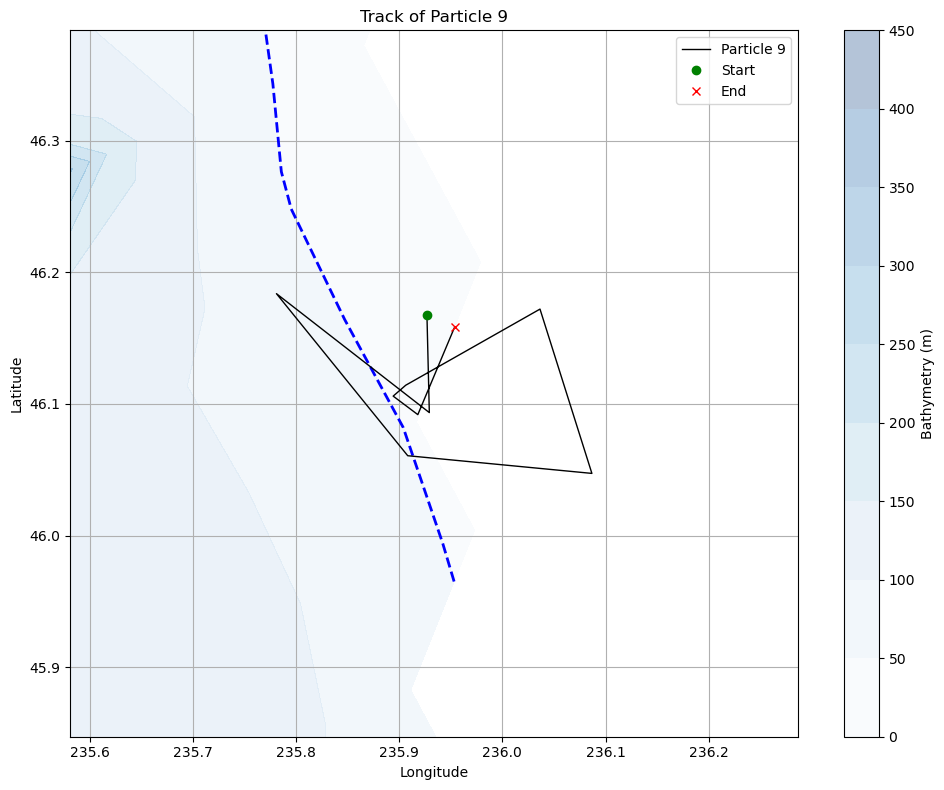

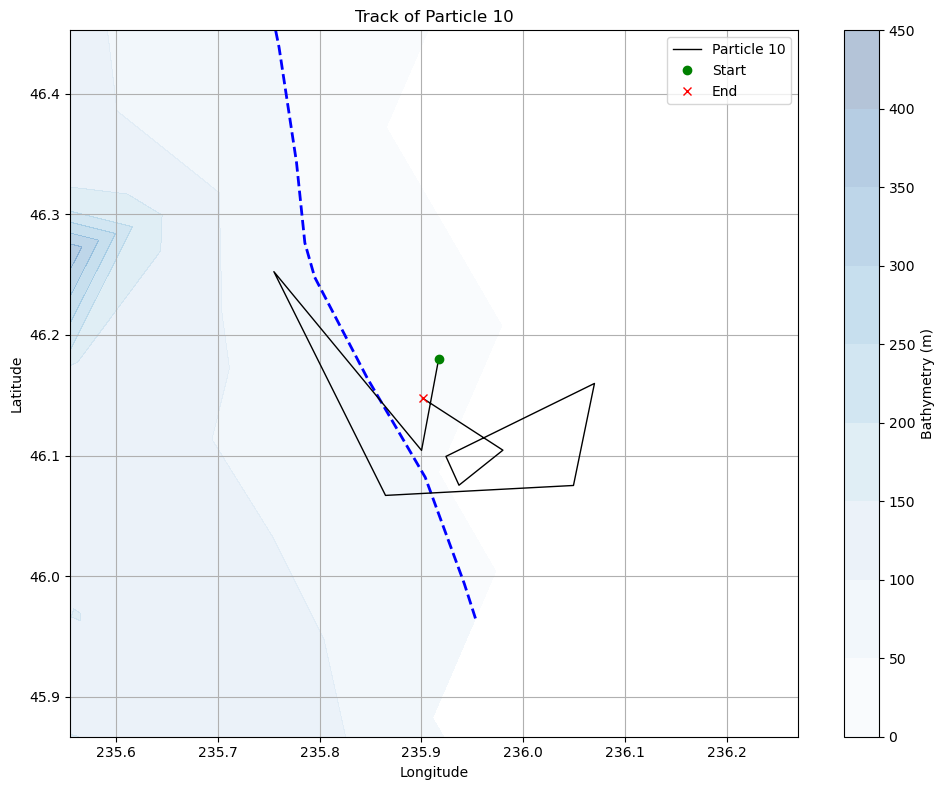

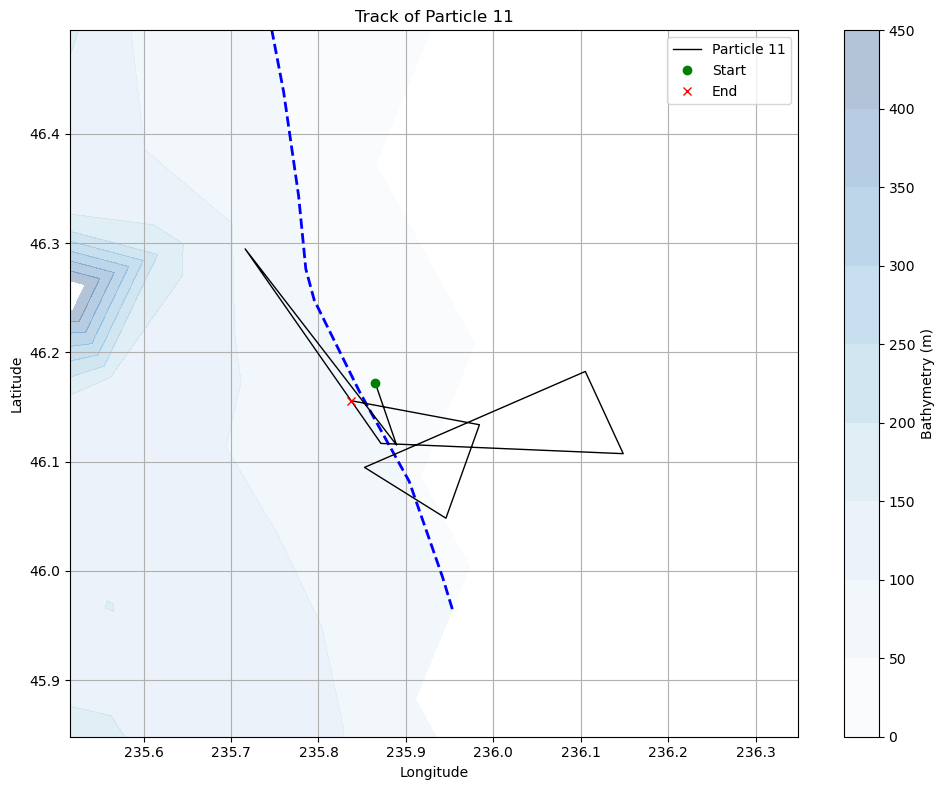

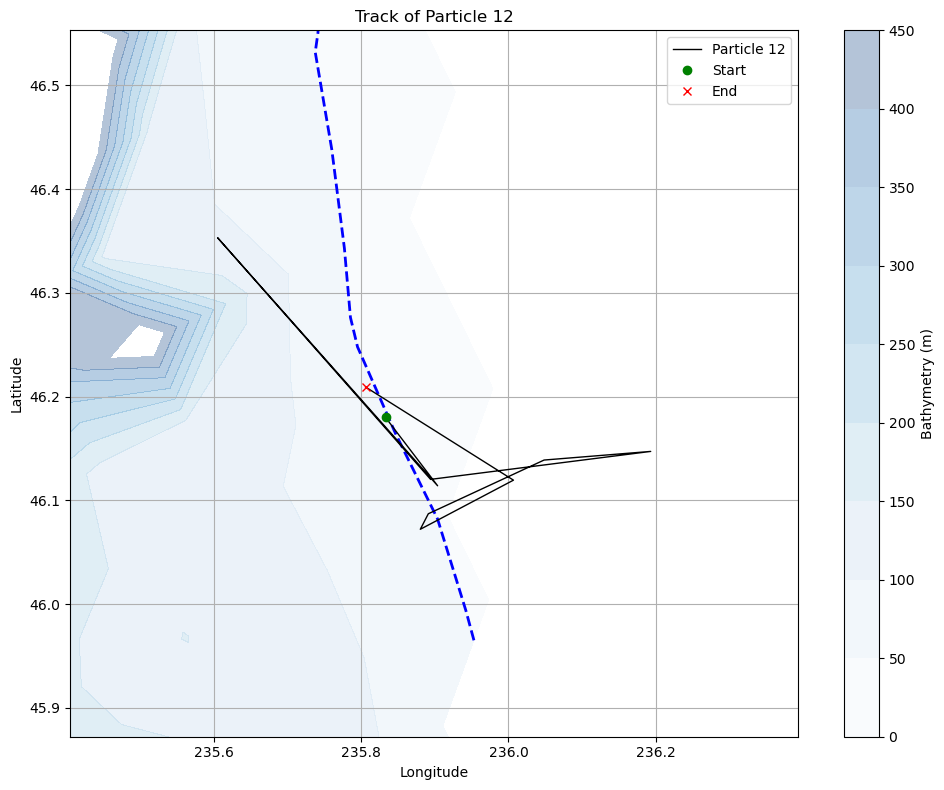

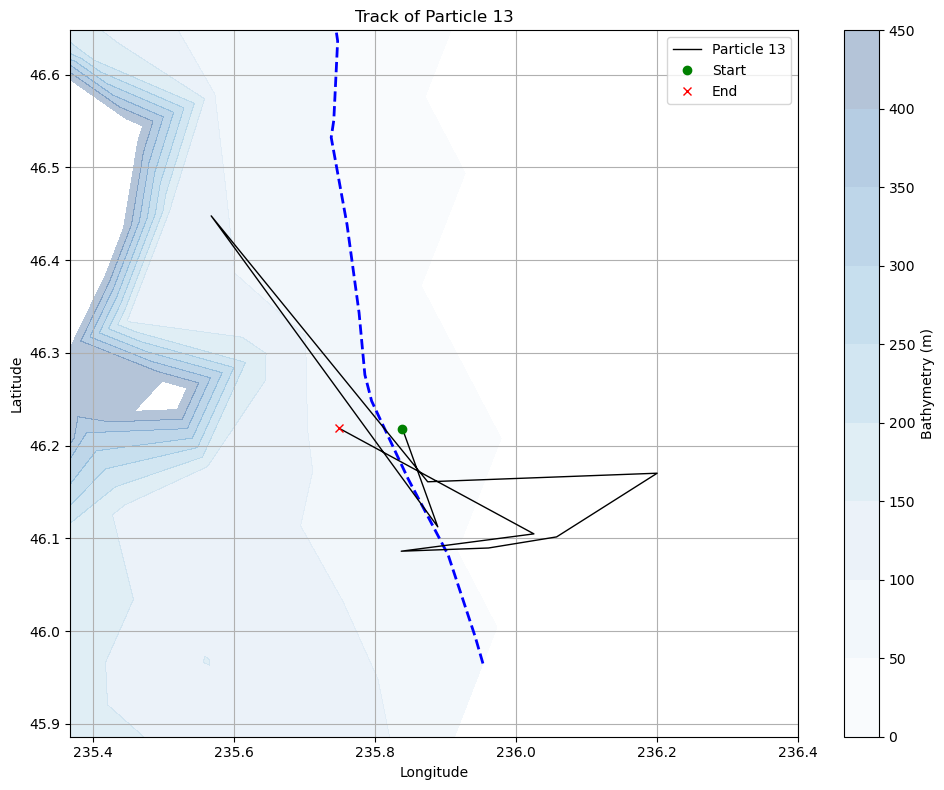

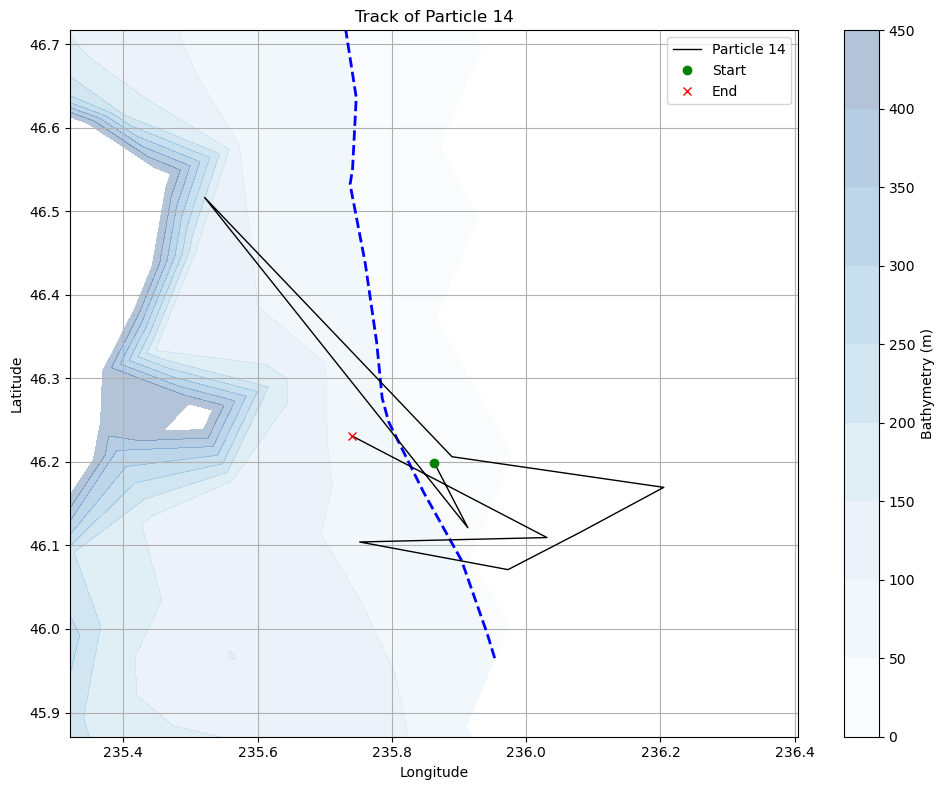

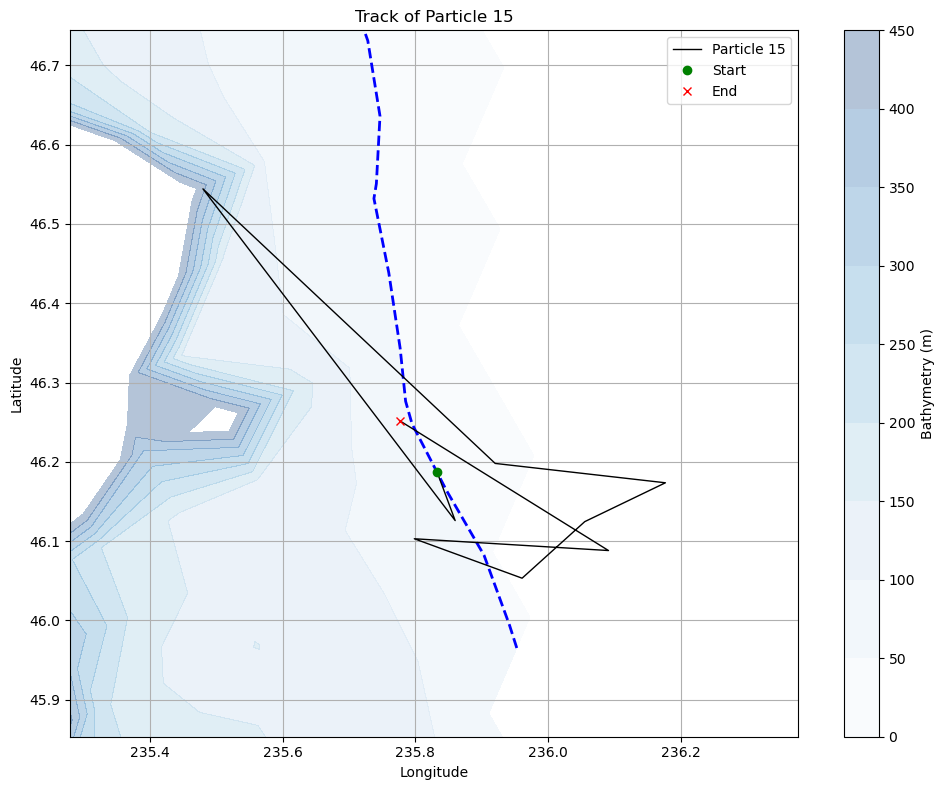

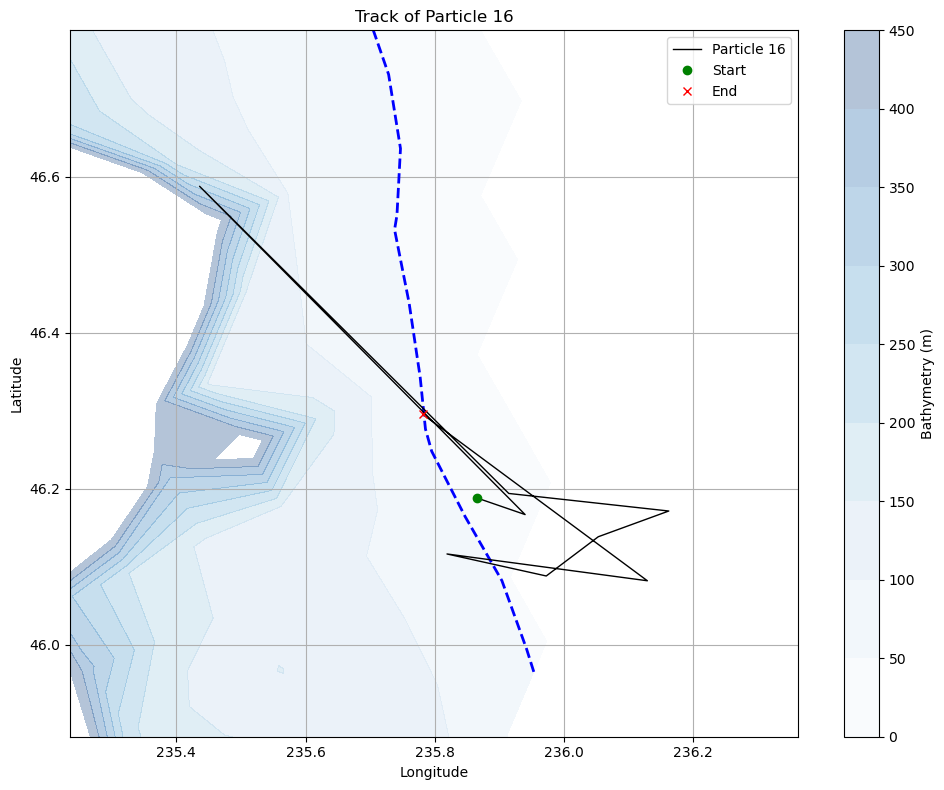

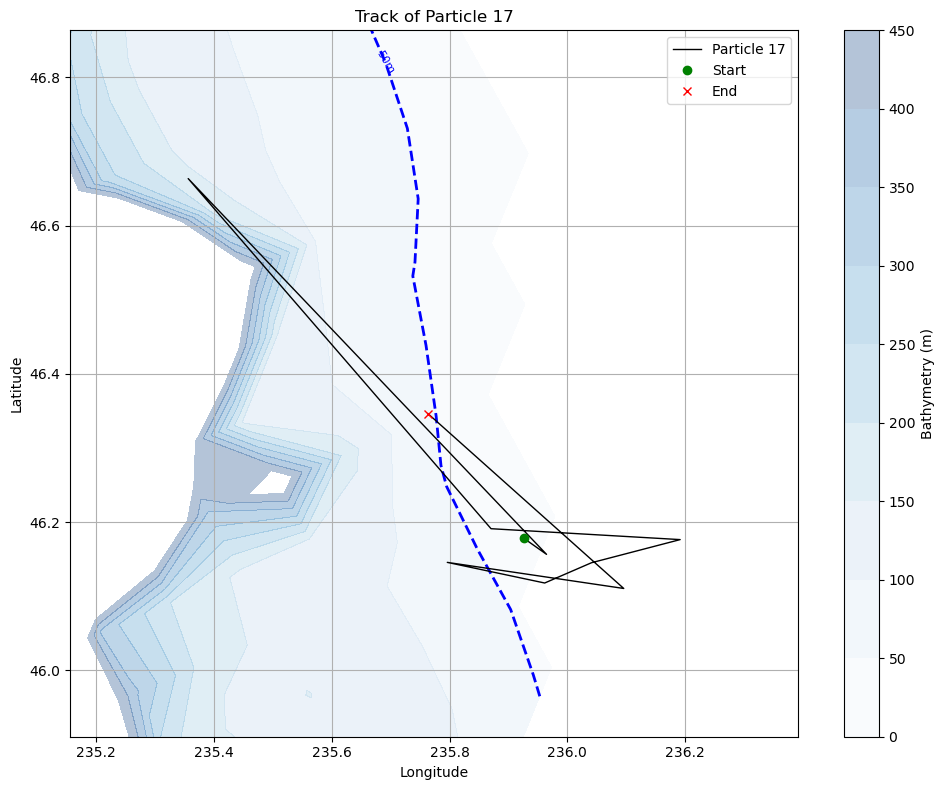

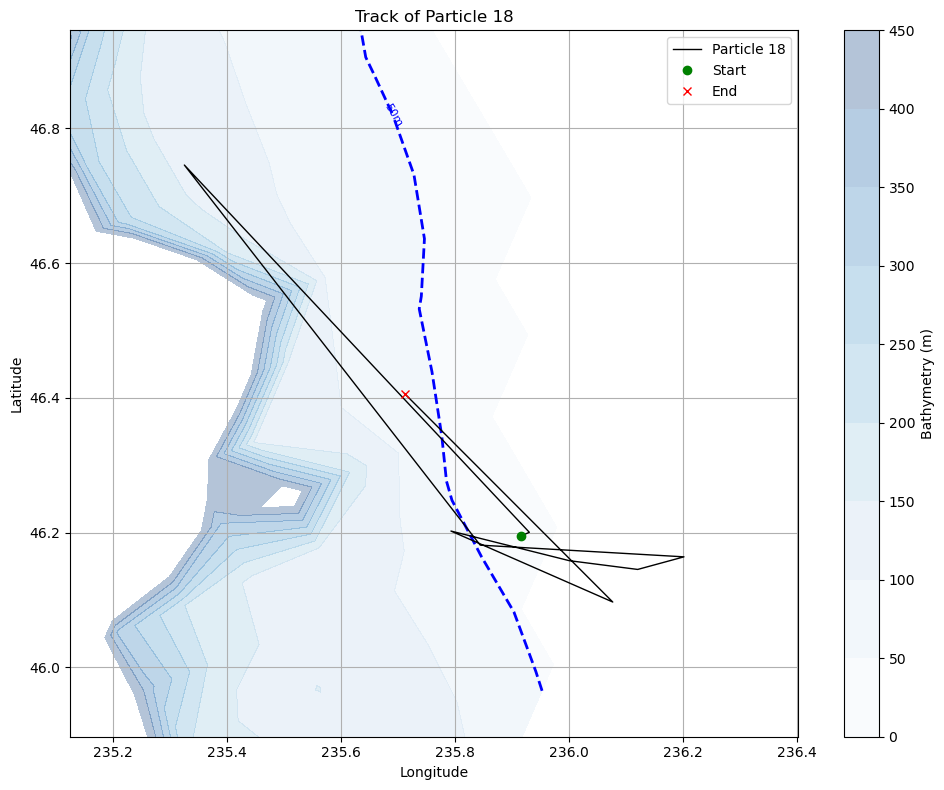

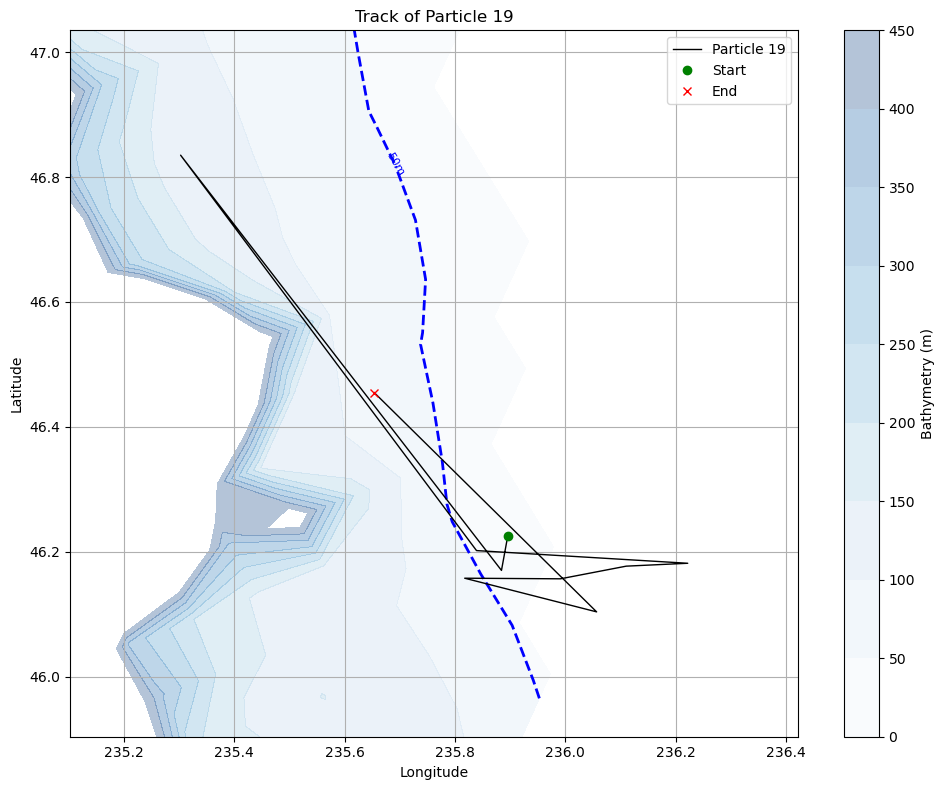

In [49]:
for p in range(lon.shape[1]):  # loop through each particle
    plt.figure(figsize=(10, 8))

    # === Bathymetry shading (context) ===
    contourf = plt.contourf(
        lon_bathy, lat_bathy, depth,
        levels=np.arange(0, 500, 50),
        cmap='Blues', alpha=0.3
    )

    # === 50m isobath line ===
    contour = plt.contour(
        lon_bathy, lat_bathy, depth,
        levels=[50], colors='blue', linewidths=2, linestyles='--'
    )
    plt.clabel(contour, inline=True, fontsize=8, fmt="50m")

    # === Plot single particle track ===
    plt.plot(lon[:, p], lat[:, p], color='black', lw=1, label=f'Particle {p}')
    plt.plot(lon[0, p], lat[0, p], 'go', label='Start')  # green start
    plt.plot(lon[-1, p], lat[-1, p], 'rx', label='End')  # red end

    # === Expand map domain slightly around this particle ===
    margin = 0.2
    plt.xlim(lon[:, p].min() - margin, lon[:, p].max() + margin)
    plt.ylim(lat[:, p].min() - margin, lat[:, p].max() + margin)

    # === Labels and title ===
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Track of Particle {p}")
    plt.grid(True)
    plt.colorbar(contourf, label="Bathymetry (m)")
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()


/home/wilczynl/conda_envs/parcels1/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


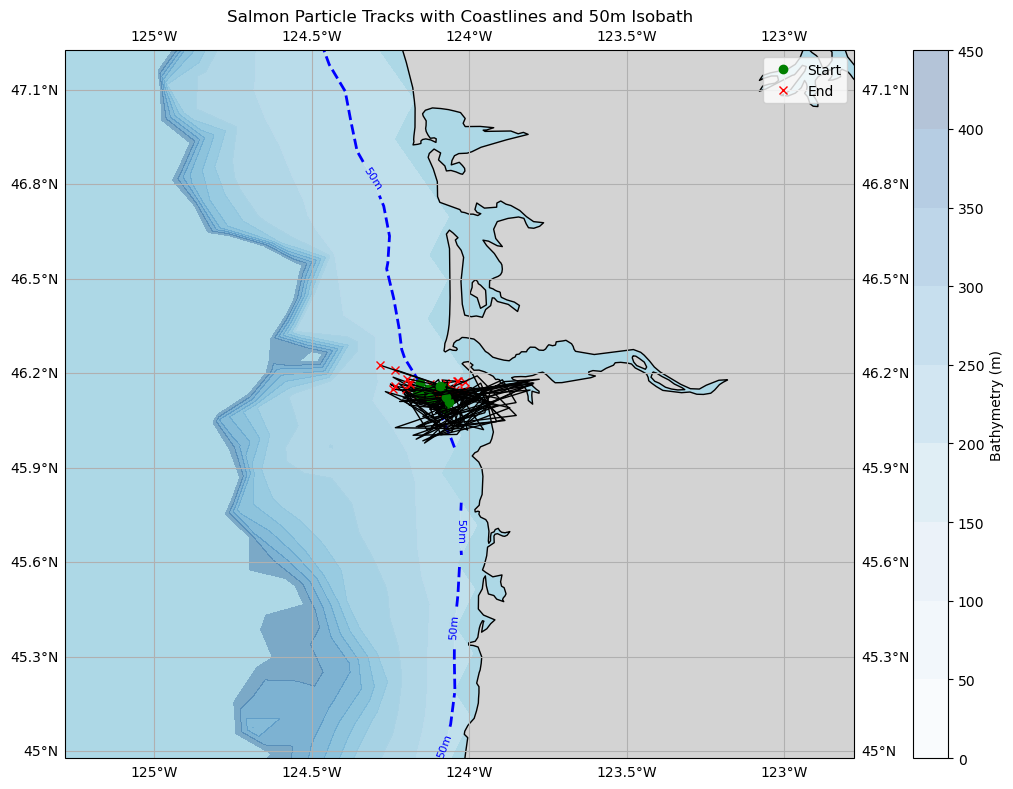

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure and map with PlateCarree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set map extent (expand as needed)
ax.set_extent([lon.min() - 1, lon.max() + 1, lat.min() - 1, lat.max() + 1], crs=ccrs.PlateCarree())

# Add coastlines and optional features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.gridlines(draw_labels=True)

# Plot bathymetry
contourf = ax.contourf(
    lon_bathy, lat_bathy, depth,
    levels=np.arange(0, 500, 50),
    cmap='Blues', alpha=0.3,
    transform=ccrs.PlateCarree()
)

contour = ax.contour(
    lon_bathy, lat_bathy, depth,
    levels=[50], colors='blue', linewidths=2, linestyles='--',
    transform=ccrs.PlateCarree()
)
ax.clabel(contour, inline=True, fontsize=8, fmt="50m")

# Plot particle tracks
for p in range(lon.shape[1]):
    ax.plot(lon[:, p], lat[:, p], color='black', lw=1, transform=ccrs.PlateCarree())
    ax.plot(lon[0, p], lat[0, p], 'go', label='Start' if p == 0 else "", transform=ccrs.PlateCarree())
    ax.plot(lon[-1, p], lat[-1, p], 'rx', label='End' if p == 0 else "", transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', label='Bathymetry (m)')

# Final labels
plt.title("Salmon Particle Tracks with Coastlines and 50m Isobath")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


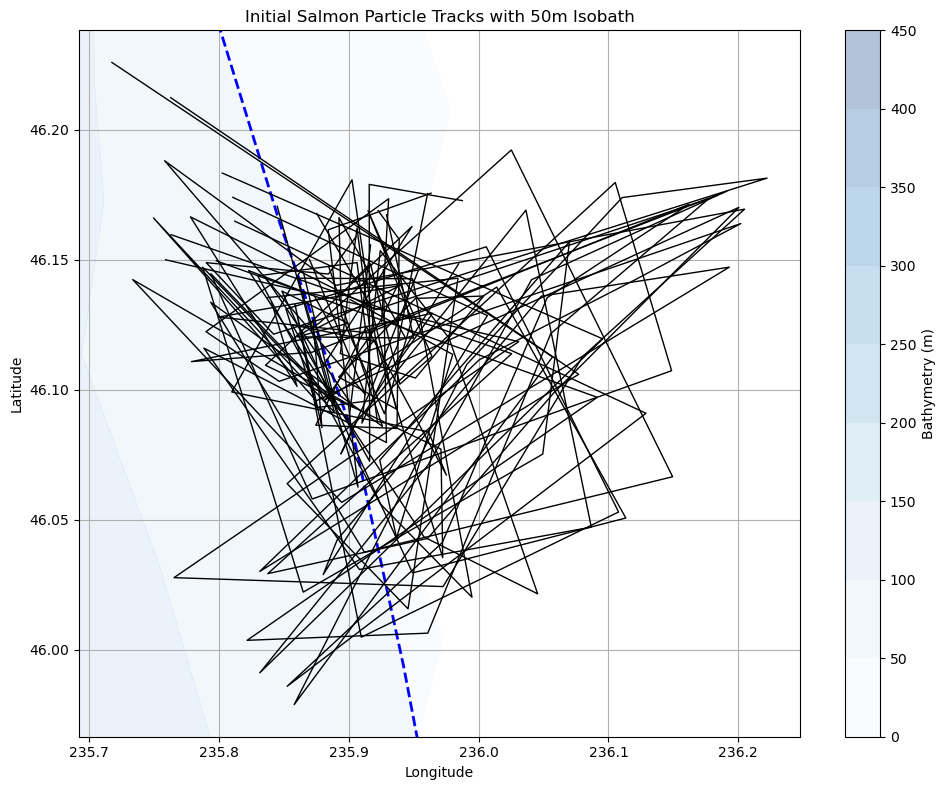

In [37]:
# --- Create plot ---
plt.figure(figsize=(10, 8))

# === Bathymetry shading (context) ===
contourf = plt.contourf(
    lon_bathy, lat_bathy, depth,
    levels=np.arange(0, 500, 50),
    cmap='Blues', alpha=0.3
)

# === 50m isobath line ===
contour = plt.contour(
    lon_bathy, lat_bathy, depth,
    levels=[50], colors='blue', linewidths=2, linestyles='--'
)
plt.clabel(contour, inline=True, fontsize=8, fmt="50m")

# === Particle tracks ===
for p in range(lon.shape[1]):
    plt.plot(lon[:, p], lat[:, p], color='black', lw=1)

# === Labels and title ===
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Initial Salmon Particle Tracks with 50m Isobath")
plt.grid(True)
plt.colorbar(contourf, label="Bathymetry (m)")

plt.tight_layout()
plt.show()


/tmp/ipykernel_572494/3708024799.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(lon_bathy, lat_bathy, depth, levels=[50], colors='blue', linewidths=2, linestyles='--', label='50m Isobath')


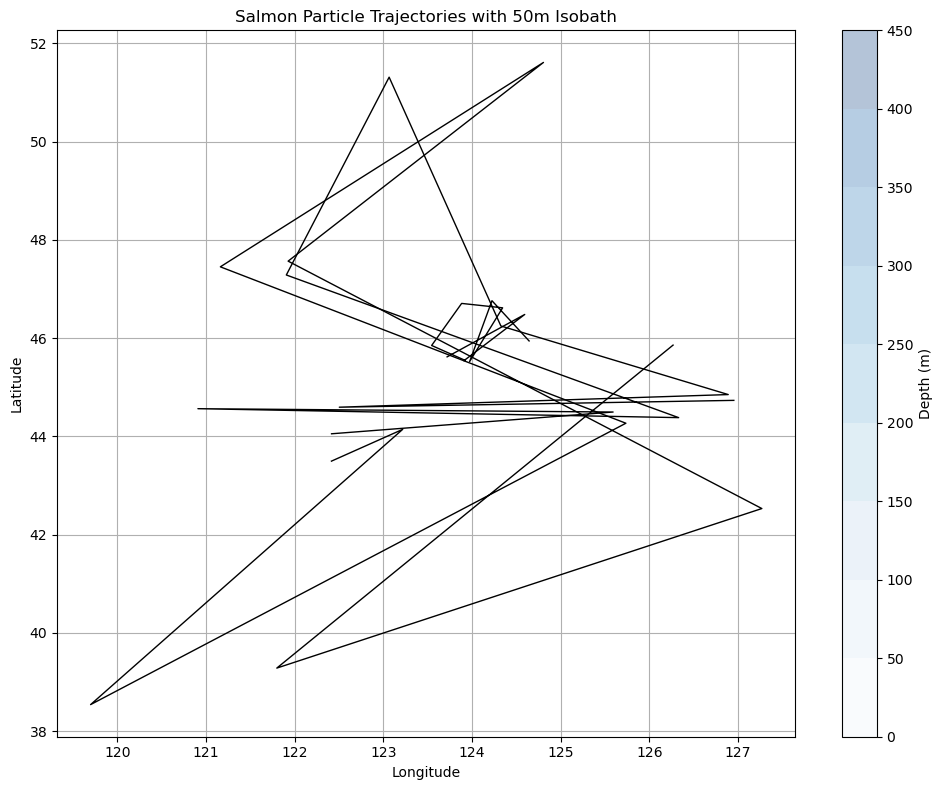

In [11]:
# 3. Plotting
plt.figure(figsize=(10, 8))

# Bathymetry contour
plt.contour(lon_bathy, lat_bathy, depth, levels=[50], colors='blue', linewidths=2, linestyles='--', label='50m Isobath')

# Full bathymetry shaded (optional, nice context)
plt.contourf(lon_bathy, lat_bathy, depth, levels=np.arange(0, 500, 50), cmap='Blues', alpha=0.3)

# Plot each particle track
for p in range(lon.shape[1]):
    plt.plot(lon[:, p], lat[:, p], lw=1, label=f'Particle {p}' if p==0 else "", color='black')

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Salmon Particle Trajectories with 50m Isobath")
plt.grid(True)
plt.colorbar(label="Depth (m)")
plt.tight_layout()
plt.show()